1)Let’s start by building a hierarchical clustering model. First, read the data set. Then, compute the Euclidian distances. You should cluster on all of the features.

Plot the dendrogram.

Creating the distances will probably take you a while. Why? Explain.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans

# Load the data
data = pd.read_csv('dailykos.csv')
data.head(6)

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
data.tail(6)

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
3424,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

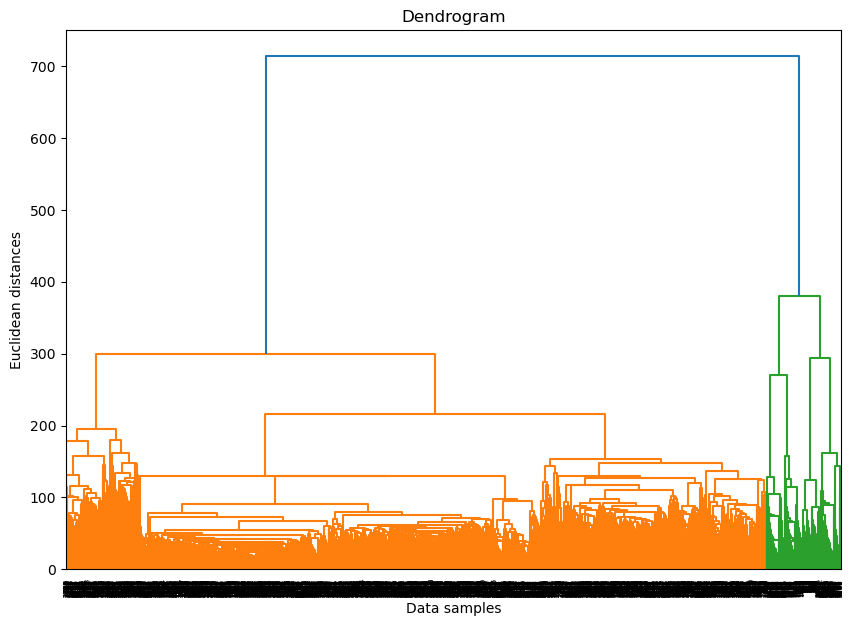

In [4]:
from scipy.spatial.distance import pdist

# Compute the pairwise Euclidean distances
euclidean_distances = pdist(scaled_data, metric='euclidean')

# Hierarchical clustering using the Euclidean distances
linkage_matrix = shc.linkage(euclidean_distances, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Data samples")
plt.ylabel("Euclidean distances")
plt.show()

In [5]:
# Display the Euclidean distance values
print("Pairwise Euclidean Distances:")
print(euclidean_distances)
from scipy.spatial.distance import squareform

square_distances = squareform(euclidean_distances)
print("Square Matrix of Euclidean Distances:")
print(square_distances)

Pairwise Euclidean Distances:
[41.37229174 52.42133173 74.16447179 ... 30.62233253 43.78275714
 31.96534425]
Square Matrix of Euclidean Distances:
[[ 0.         41.37229174 52.42133173 ... 46.13076948 42.97690798
  46.02321579]
 [41.37229174  0.         45.03461223 ... 40.15317519 35.4333136
  38.95929698]
 [52.42133173 45.03461223  0.         ... 50.24551804 46.53218897
  49.05223774]
 ...
 [46.13076948 40.15317519 50.24551804 ...  0.         30.62233253
  43.78275714]
 [42.97690798 35.4333136  46.53218897 ... 30.62233253  0.
  31.96534425]
 [46.02321579 38.95929698 49.05223774 ... 43.78275714 31.96534425
   0.        ]]


2) In this problem, we are trying to cluster news articles or blog posts into groups. This can be used to show readers categories to choose from when trying to decide what to read. Just thinking about this application, what are good choices for the number of clusters? Explain your thinking.

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming you have your data in a variable called 'data'
# data should be a 2D array with shape (6, 1545)

# You can choose a range of cluster numbers to evaluate
cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    # Fit a clustering algorithm, such as KMeans
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(data)

    # Compute the Silhouette Score
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the cluster number with the highest Silhouette Score
best_n_clusters = cluster_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

print(f"The best number of clusters is {best_n_clusters} with a Silhouette Score of {best_score:.2f}")


/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

The best number of clusters is 2 with a Silhouette Score of 0.25


In the above dendogram The x-axis contains the samples and y-axis represents the distance between these samples. 
The vertical line with maximum distance is the blue line and hence we can decide a threshold of 500 and cut the 
dendrogram at this point.
The number of clusters from above cuts is 2.
From silhouette score also the best number of clusters is 2.


3)Let’s pick 7 clusters and answer the following questions:

How many observations are in cluster 3?
Which cluster has the most observations?
Which cluster has the fewest observations?

In [7]:
# Cluster the data into 7 clusters
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(scaled_data)

# Count observations in each cluster
counts = np.bincount(cluster_labels)

print("Number of observations in cluster 3:", counts[2])
print("Cluster with most observations:", counts.argmax()+1)
print("Cluster with fewest observations:", counts.argmin()+1)

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of observations in cluster 3: 88
Cluster with most observations: 7
Cluster with fewest observations: 2


In [8]:

# number of observations in each cluster
for i, count in enumerate(counts):
    print(f"Number of observations in cluster {i+1}:", count)

Number of observations in cluster 1: 324
Number of observations in cluster 2: 79
Number of observations in cluster 3: 88
Number of observations in cluster 4: 997
Number of observations in cluster 5: 80
Number of observations in cluster 6: 82
Number of observations in cluster 7: 1780


4)Instead of looking at the average value in each variable individually, we’ll just look at the top 6 words in each cluster.

Compute the mean frequency values of each of the words in cluster 1, and then output the 6 words that occur the most frequently.

What is the most frequent word in this cluster, in terms of average value?

Top 6 words in cluster 1: ['bush', 'iraq', 'democrat', 'war', 'state', 'american']
bush: 3.4598765432098766
iraq: 2.5246913580246915
democrat: 2.123456790123457
war: 1.9814814814814814
state: 1.7160493827160495
american: 1.404320987654321


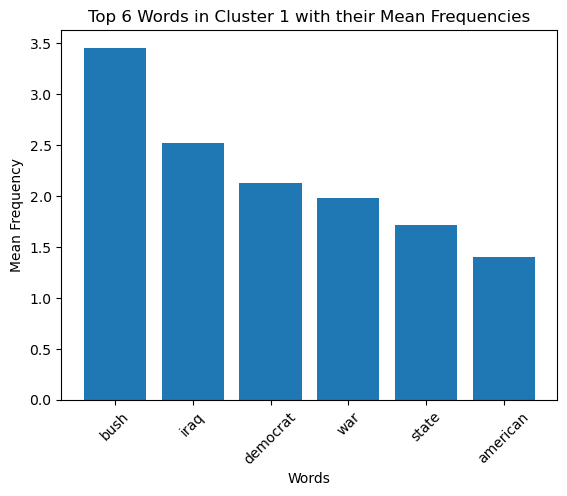

The most frequent word in cluster 1 in terms of average value is: bush


In [9]:
cluster1_data = data[cluster_labels == 0]
mean_cluster1 = cluster1_data.mean().sort_values(ascending=False)

# Get the top 6 words and their frequencies
top_6_words = mean_cluster1.head(6).index.tolist()
top_6_frequencies = mean_cluster1.head(6).tolist()

print("Top 6 words in cluster 1:", top_6_words)
for word, freq in zip(top_6_words, top_6_frequencies):
    print(f"{word}: {freq}")

# Plotting the graph
plt.bar(top_6_words, top_6_frequencies)
plt.xlabel('Words')
plt.ylabel('Mean Frequency')
plt.title('Top 6 Words in Cluster 1 with their Mean Frequencies')
plt.xticks(rotation=45)
plt.show()

# Most frequent word in terms of average value
most_frequent_word = top_6_words[0]
print(f"The most frequent word in cluster 1 in terms of average value is: {most_frequent_word}")


5)Now repeat the command given in the previous problem for each of the other clusters, and answer the following questions.
Which cluster could best be described as the cluster related to the Iraq war?
In 2004, one of the candidates for the Democratic nomination for the President of the United States was Howard Dean, John Kerry was the candidate who won the democratic nomination, and John Edwards with the running mate of John Kerry (the Vice President nominee). Given this information, which cluster best corresponds to the democratic party? 

In [10]:
for i in range(7):
    cluster_data = data[cluster_labels == i]
    mean_cluster = cluster_data.mean().sort_values(ascending=False)
    
    # Get the top 6 words and their frequencies
    top_6_words = mean_cluster.head(6).index.tolist()
    top_6_frequencies = mean_cluster.head(6).tolist()
    
    print(f"\nTop 6 words in cluster {i+1}:", top_6_words)
    for word, freq in zip(top_6_words, top_6_frequencies):
        # Display frequency with two decimal places
        print(f"{word}: {freq:.3f}")

    # Most frequent word in terms of average value
    most_frequent_word = top_6_words[0]
    print(f"\nThe most frequent word in cluster {i+1} in terms of average value is: {most_frequent_word}")




Top 6 words in cluster 1: ['bush', 'iraq', 'democrat', 'war', 'state', 'american']
bush: 3.460
iraq: 2.525
democrat: 2.123
war: 1.981
state: 1.716
american: 1.404

The most frequent word in cluster 1 in terms of average value is: bush

Top 6 words in cluster 2: ['november', 'poll', 'challenge', 'democrat', 'house', 'bush']
november: 11.063
poll: 4.152
challenge: 4.139
democrat: 2.759
house: 2.633
bush: 2.620

The most frequent word in cluster 2 in terms of average value is: november

Top 6 words in cluster 3: ['november', 'vote', 'bush', 'poll', 'challenge', 'republican']
november: 9.841
vote: 4.955
bush: 4.375
poll: 4.205
challenge: 4.057
republican: 2.943

The most frequent word in cluster 3 in terms of average value is: november

Top 6 words in cluster 4: ['bush', 'kerry', 'democrat', 'republican', 'state', 'poll']
bush: 3.012
kerry: 1.826
democrat: 1.814
republican: 1.388
state: 1.350
poll: 1.286

The most frequent word in cluster 4 in terms of average value is: bush

Top 6 words 

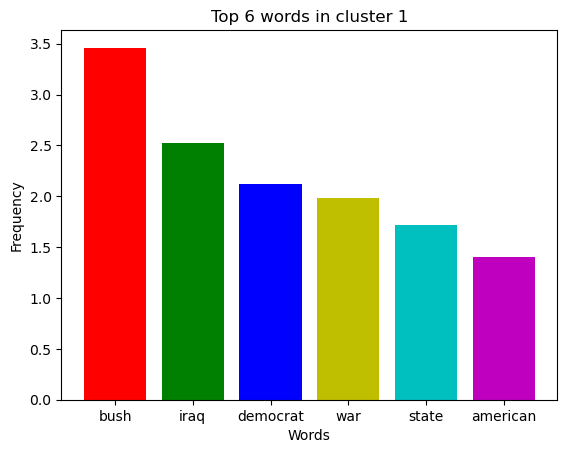


The most frequent word in cluster 1 in terms of average value is: bush


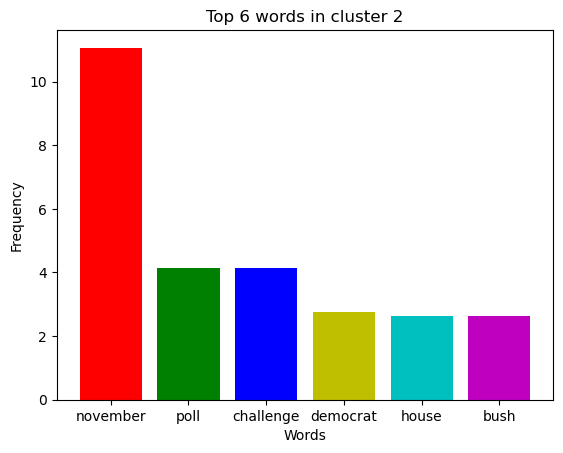


The most frequent word in cluster 2 in terms of average value is: november


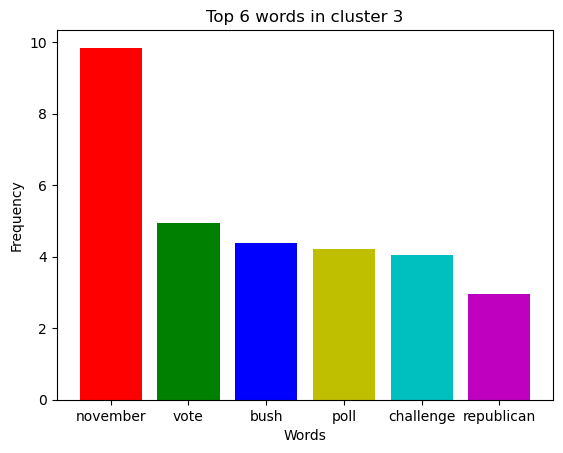


The most frequent word in cluster 3 in terms of average value is: november


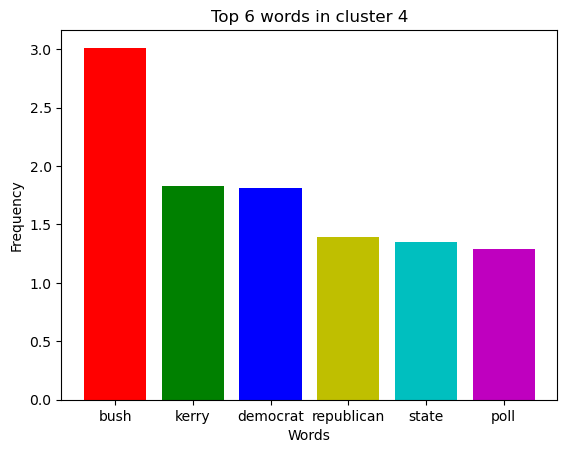


The most frequent word in cluster 4 in terms of average value is: bush


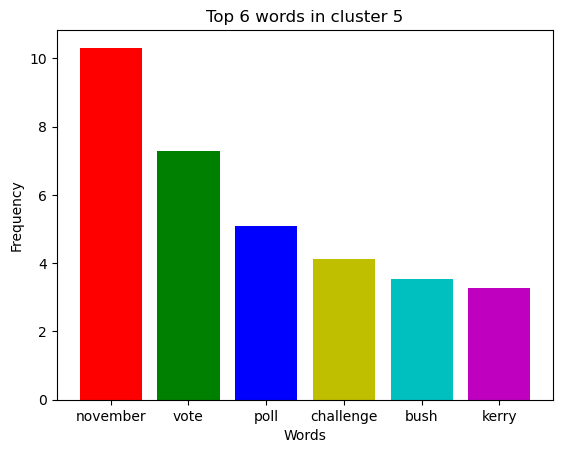


The most frequent word in cluster 5 in terms of average value is: november


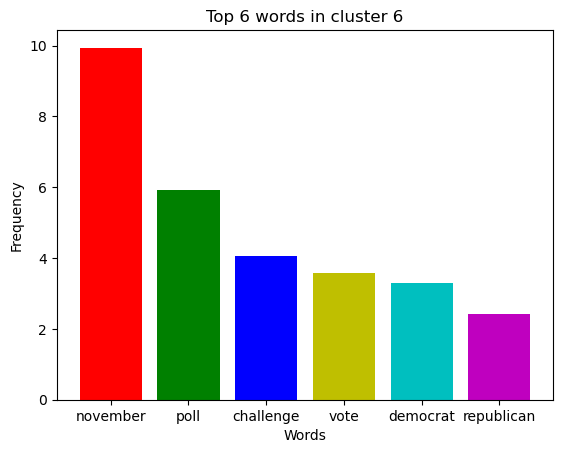


The most frequent word in cluster 6 in terms of average value is: november


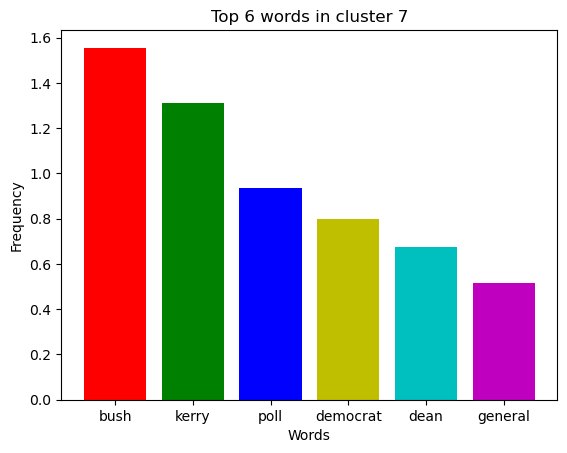


The most frequent word in cluster 7 in terms of average value is: bush


In [11]:


for i in range(7):
    cluster_data = data[cluster_labels == i]
    mean_cluster = cluster_data.mean().sort_values(ascending=False)
    
    # Get the top 6 words and their frequencies
    top_6_words = mean_cluster.head(6).index.tolist()
    top_6_frequencies = mean_cluster.head(6).tolist()
    
    # Plotting
    colors = ['r', 'g', 'b', 'y', 'c', 'm']  # Red, Green, Blue, Yellow, Cyan, Magenta
    plt.bar(top_6_words, top_6_frequencies, color=colors)
    plt.title(f"Top 6 words in cluster {i+1}")
    plt.ylabel('Frequency')
    plt.xlabel('Words')
    plt.show()
    
    # Most frequent word in terms of average value
    most_frequent_word = top_6_words[0]
    print(f"\nThe most frequent word in cluster {i+1} in terms of average value is: {most_frequent_word}")


Cluster 1 with the most frequent words bush, iraq, democrat, war, state is represents the cluster related to the iraq war.

Based on the information provided about the 2004 Democratic nomination for the President of the United States, it's clear that John Kerry was the candidate who won the Democratic nomination. Additionally, John Edwards was the running mate of John Kerry, making him the Vice Presidential nominee.

Given this information, we can infer that the cluster containing terms related to John Kerry, the Democratic nomination, and potentially John Edwards corresponds best to the Democratic Party. Let's examine the clusters:
Cluster 2: ['november', 'poll', 'challenge', 'democrat', 'house', 'bush']
Cluster 4: ['bush', 'kerry', 'democrat', 'republican', 'state', 'poll']
Cluster 6: ['november', 'poll', 'challenge', 'vote', 'democrat', 'republican']

Cluster 4 seems to be the most relevant to the Democratic Party. It contains the term 'kerry,' which is John Kerry, and 'democrat,' which directly relates to the Democratic Party. Cluster 2 also has the term 'democrat,' but it also includes other terms that might not be as directly related to the Democratic Party.

Therefore, Cluster 4 best corresponds to the Democratic Party based on the provided information.






6)Now, run k-means clustering, setting the random state to 1000. Again, pick the number of clusters equal to 7.

Subset your data into the 7 clusters (7 new datasets) by using the "cluster" variable of your kmeans output.

How many observations are in Cluster 3?
Which cluster has the most observations?
Which cluster has the fewest number of observations?

In [12]:
kmeans = KMeans(n_clusters=7, random_state=1000)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Count observations in each cluster
kmeans_counts = np.bincount(kmeans_labels)

print("Number of observations in K-means cluster 3:", kmeans_counts[2])
print("K-means cluster with most observations:", kmeans_counts.argmax()+1)
print("K-means cluster with fewest observations:", kmeans_counts.argmin()+1)


/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of observations in K-means cluster 3: 2526
K-means cluster with most observations: 3
K-means cluster with fewest observations: 2


In [13]:
for i, count in enumerate(kmeans_counts):
    print(f"Number of observations in K-means cluster {i + 1}:", count)

Number of observations in K-means cluster 1: 83
Number of observations in K-means cluster 2: 3
Number of observations in K-means cluster 3: 2526
Number of observations in K-means cluster 4: 567
Number of observations in K-means cluster 5: 3
Number of observations in K-means cluster 6: 92
Number of observations in K-means cluster 7: 156


7)Now, output the six most frequent words in each cluster, like we did in the previous problem, for each of the k-means clusters.

Which k-means cluster best corresponds to the Iraq War?
Which k-means cluster best corresponds to the democratic party? (Remember that we are looking for the names of the key democratic party leaders.)



In [14]:
for i in range(7):
    cluster_data = data[kmeans_labels == i]
    mean_cluster = cluster_data.mean().sort_values(ascending=False)
    print(f"Top 6 words in K-means cluster {i+1}:", mean_cluster.head(6).index.tolist())

Top 6 words in K-means cluster 1: ['november', 'poll', 'challenge', 'vote', 'democrat', 'house']
Top 6 words in K-means cluster 2: ['official', 'rumsfeld', 'abu', 'ghraib', 'pentagon', 'iraq']
Top 6 words in K-means cluster 3: ['bush', 'kerry', 'poll', 'democrat', 'republican', 'state']
Top 6 words in K-means cluster 4: ['bush', 'democrat', 'state', 'iraq', 'kerry', 'republican']
Top 6 words in K-means cluster 5: ['seat', 'democrat', 'dem', 'poll', 'senate', 'race']
Top 6 words in K-means cluster 6: ['november', 'poll', 'challenge', 'democrat', 'bush', 'house']
Top 6 words in K-means cluster 7: ['november', 'vote', 'poll', 'challenge', 'bush', 'republican']


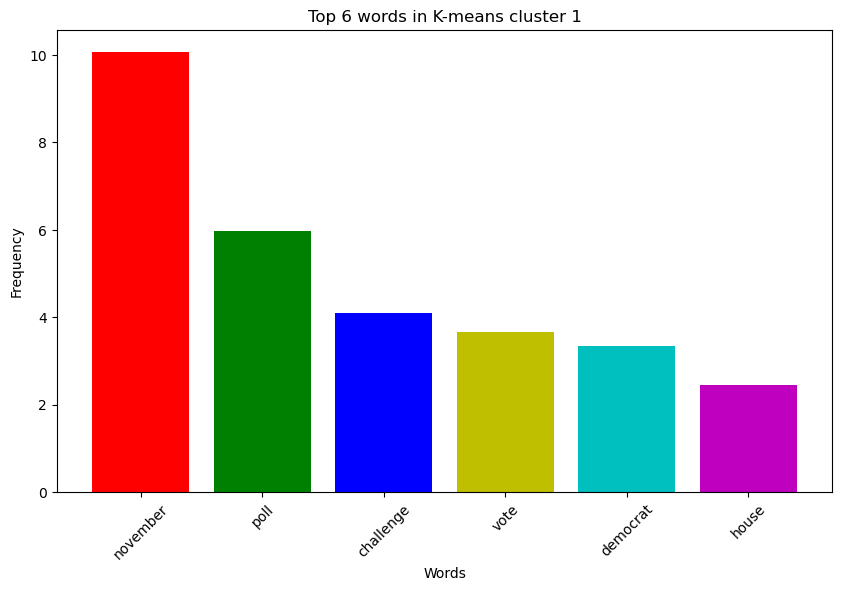

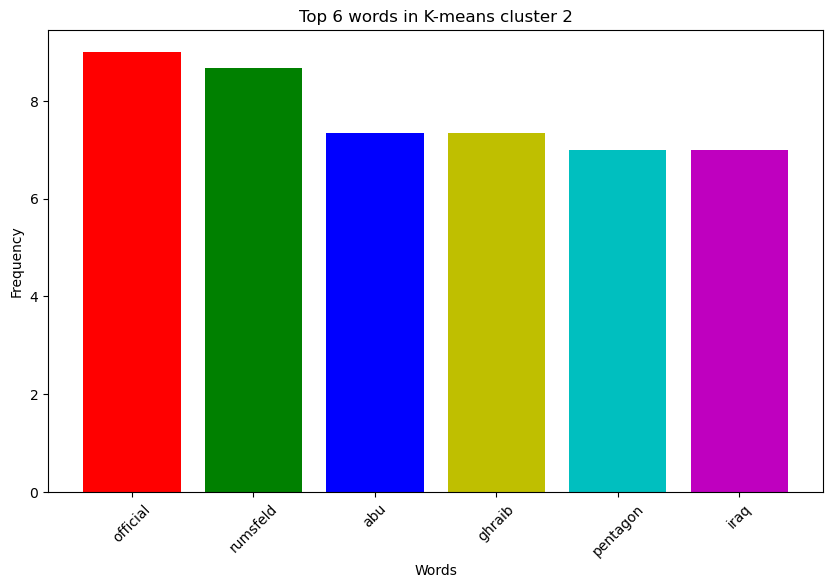

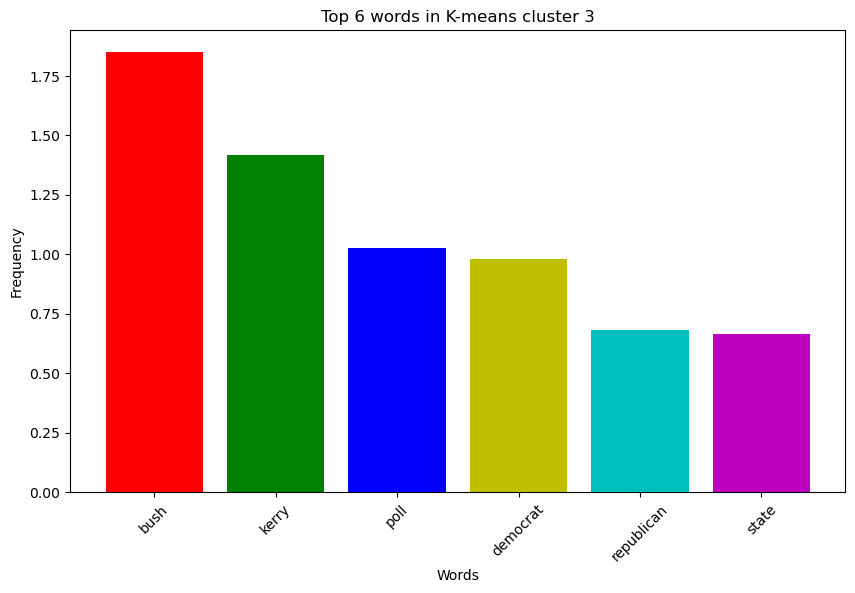

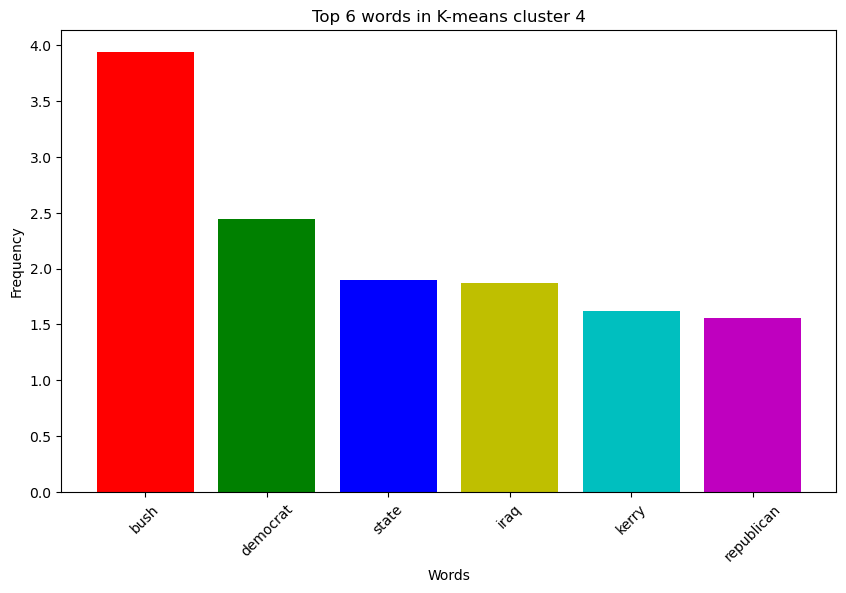

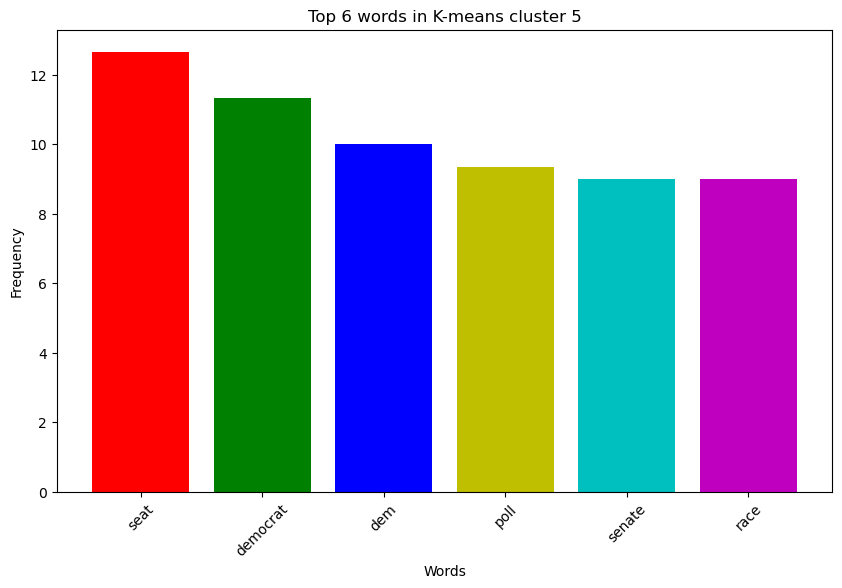

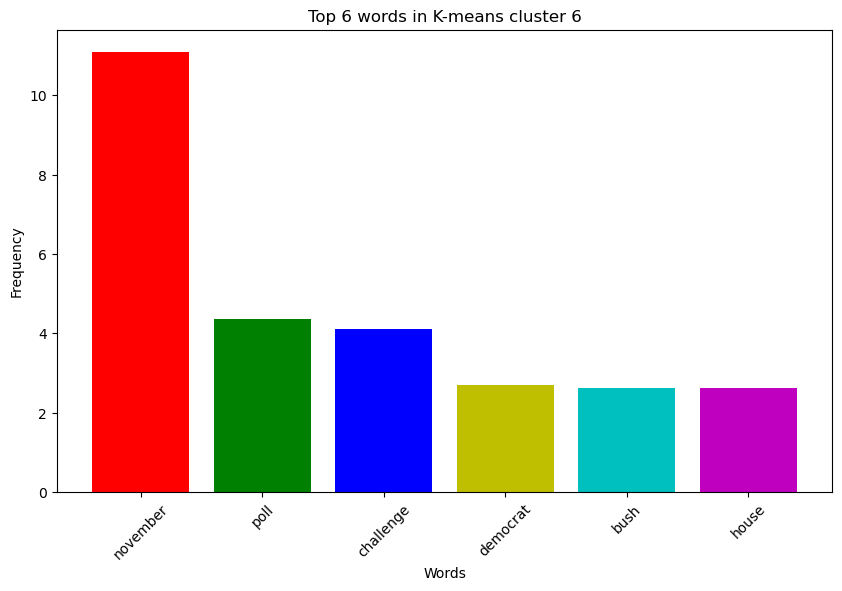

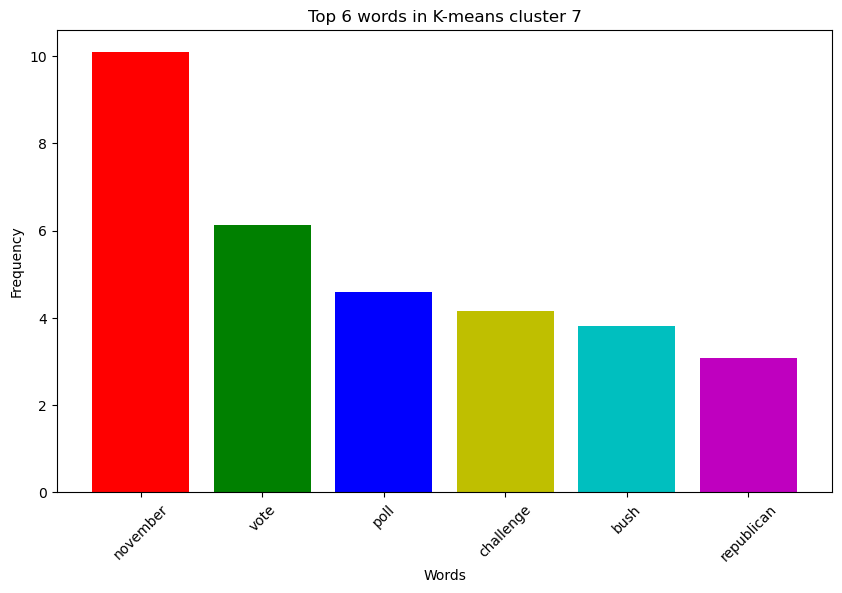

In [15]:
for i in range(7):
    cluster_data = data[kmeans_labels == i]
    mean_cluster = cluster_data.mean().sort_values(ascending=False)
    
    # Get the top 6 words and their frequencies
    top_6_words = mean_cluster.head(6).index.tolist()
    top_6_frequencies = mean_cluster.head(6).tolist()
    
    # Plotting
    colors = ['r', 'g', 'b', 'y', 'c', 'm']  # Red, Green, Blue, Yellow, Cyan, Magenta
    plt.figure(figsize=(10, 6))
    plt.bar(top_6_words, top_6_frequencies, color=colors)
    plt.title(f"Top 6 words in K-means cluster {i+1}")
    plt.ylabel('Frequency')
    plt.xlabel('Words')
    plt.xticks(rotation=45)
    plt.show()


Cluster 2 appears to be the one most likely related to the Iraq War. It contains the term 'iraq' along with other terms that are relevant to the Iraq War, such as 'official,' 'rumsfeld,' and 'abu ghraib,' which are associated with the U.S. government's actions and controversies during the Iraq War.
Therefore, Cluster 2 best corresponds to the Iraq War based on the presence of terms directly related to the conflict.

To determine which K-means cluster best corresponds to the Democratic Party, we should look for clusters that contain terms and keywords related to the Democratic Party. Here are the clusters and their top words:
Cluster 1 contains the term 'democrat,' which directly relates to the Democratic Party. Therefore, Cluster 1 best corresponds to the Democratic Party based on the presence of the term 'democrat.'

8)For the rest of this problem, I’ll ask you to compare how observations were assigned to clusters in the two different methods. You could use the Pandas crosstab function to compare the cluster assignment of hierarchical clustering to the cluster assignment of k-means clustering. :

Which Hierarchical Cluster best corresponds to K-Means Cluster 2?
Which Hierarchical Cluster best corresponds to K-Means Cluster 3?

In [16]:
comparison = pd.crosstab(cluster_labels + 1, kmeans_labels + 1)
print(comparison)

# Determine which hierarchical cluster corresponds to each k-means cluster
print("Hierarchical cluster corresponding to K-means cluster 2:", comparison[2].idxmax())
print("Hierarchical cluster corresponding to K-means cluster 3:", comparison[3].idxmax())

col_0   1  2     3    4  5   6   7
row_0                             
1       2  3    49  266  3   1   0
2       0  0     0    0  0  78   1
3       0  0     0    2  0   0  86
4       0  0   708  287  0   0   2
5       0  0     0    0  0  13  67
6      81  0     1    0  0   0   0
7       0  0  1768   12  0   0   0
Hierarchical cluster corresponding to K-means cluster 2: 1
Hierarchical cluster corresponding to K-means cluster 3: 7


To find the Hierarchical Cluster that corresponds to K-Means Cluster 2, we look at the row corresponding to K-Means Cluster 2, which is row 2. The Hierarchical Cluster that corresponds to K-Means Cluster 2 is Cluster 1, as there are 3 data points in Hierarchical Cluster 6 that belong to K-Means Cluster 2.

To find the Hierarchical Cluster that corresponds to K-Means Cluster 3, we look at the row corresponding to K-Means Cluster 3, which is row 2. The Hierarchical Cluster that corresponds to K-Means Cluster 3 is Cluster 7, as there are 1768 data points in Hierarchical Cluster 7 that belong to K-Means Cluster 3.


The best Hierarchical cluster best correponds to K-means cluster 2 is Cluster 1
The best Hierarchial cluster best correpsonds to k-means cluster 3 is cluster 7